# **Modules**

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
import numpy as np

# **Importing preprocessed DataFrame**

In [4]:
df=pd.read_csv("/content/Preprocessing.csv")

In [6]:
df

,First_Expression,Review,Rating,Month,preprocessed_review,preprocessed_firstexpression,preprocessed_emoji,preprocessed_first_emoji,final_preprocessed,preprocessed_stopwords
0,Best in the market!,Best phone available at this price point.Camer...,5,"Oct, 2022",Best phone available at this price pointCamera...,Best in the market,Best phone available at this price pointCamera...,Best in the market,Best in the market Best phone available at thi...,Best market Best phone available price pointCa...
1,Perfect product!,Pros-rear Camera is awesome.double speaker sou...,5,"Oct, 2022",Prosrear Camera is awesomedouble speaker sound...,Perfect product,Prosrear Camera is awesomedouble speaker sound...,Perfect product,Perfect product Prosrear Camera is awesomedoub...,Perfect product Prosrear Camera awesomedouble ...
2,Brilliant,I switch to ios from android after 10 years so...,5,"Jun, 2022",I switch to ios from android after 10 years so...,Brilliant,I switch to ios from android after 10 years so...,Brilliant,Brilliant I switch to ios from android after 1...,Brilliant switch ios android 10 years review m...
3,Classy product,This is awosome .. camera is best . Here some ...,5,"Sep, 2022",This is awosome camera is best Here some pho...,Classy product,This is awosome camera is best Here some pho...,Classy product,Classy product This is awosome camera is best...,Classy product awosome camera best photos shar...
4,Perfect product!,"Awesome battery backup amazing camera, a all d...",5,"Oct, 2022",Awesome battery backup amazing camera a all da...,Perfect product,Awesome battery backup amazing camera a all da...,Perfect product,Perfect product Awesome battery backup amazing...,Perfect product Awesome battery backup amazing...
...,...,...,...,...,...,...,...,...,...,...
8812,Just wow!,Worth buying and switching over to iOS,5,3 months ago,Worth buying and switching over to iOS,Just wow,Worth buying and switching over to iOS,Just wow,Just wow Worth buying and switching over to iOS,wow Worth buying switching iOS
8813,Terrific,Nice,5,3 months ago,Nice,Terrific,Nice,Terrific,Terrific Nice,Terrific Nice
8814,Value-for-money,Thk thak 13 better,4,3 months ago,Thk thak 13 better,Valueformoney,Thk thak 13 better,Valueformoney,Valueformoney Thk thak 13 better,Valueformoney Thk thak 13 better
8815,Simply awesome,Just Wow🤩❤️,5,3 months ago,Just Wow🤩❤️,Simply awesome,Just Wow,Simply awesome,Simply awesome Just Wow,Simply awesome Wow


# **Initiating Model**

## **BERT Model**

In [7]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


###**Example**

In [8]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')
result = model(tokens)
result.logits

tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward0>)

In [9]:
int(torch.argmax(result.logits))+1

4

In [10]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

## **DISTILBERT**

In [11]:
from transformers import pipeline

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    return_all_scores=True
)


config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


### **example**

In [12]:
# english
distilled_student_sentiment_classifier ("I love this movie and i would watch it again and again!")


[[{'label': 'positive', 'score': 0.9731044769287109},
  {'label': 'neutral', 'score': 0.01691008359193802},
  {'label': 'negative', 'score': 0.00998548325151205}]]

In [14]:
def sentiment_score_distilbert(review):
    result = distilled_student_sentiment_classifier (review)
    result1=(result[0])
    value_list=[]
    for dict_i in result1:
      value_list.append(dict_i['score'])
    max_score=max(value_list)
    score= (value_list.index(max_score))+1
    if score==3:
      return("Negative")
    elif score==2:
      return("Neutral")
    else:
      return('Positive')

# **Sentiment analysis using BERT**

In [15]:
df['Bert_sentiment'] = df['final_preprocessed'].apply(lambda x: sentiment_score(x[:512]))

In [16]:
df

,First_Expression,Review,Rating,Month,preprocessed_review,preprocessed_firstexpression,preprocessed_emoji,preprocessed_first_emoji,final_preprocessed,preprocessed_stopwords,Bert_sentiment
0,Best in the market!,Best phone available at this price point.Camer...,5,"Oct, 2022",Best phone available at this price pointCamera...,Best in the market,Best phone available at this price pointCamera...,Best in the market,Best in the market Best phone available at thi...,Best market Best phone available price pointCa...,5
1,Perfect product!,Pros-rear Camera is awesome.double speaker sou...,5,"Oct, 2022",Prosrear Camera is awesomedouble speaker sound...,Perfect product,Prosrear Camera is awesomedouble speaker sound...,Perfect product,Perfect product Prosrear Camera is awesomedoub...,Perfect product Prosrear Camera awesomedouble ...,5
2,Brilliant,I switch to ios from android after 10 years so...,5,"Jun, 2022",I switch to ios from android after 10 years so...,Brilliant,I switch to ios from android after 10 years so...,Brilliant,Brilliant I switch to ios from android after 1...,Brilliant switch ios android 10 years review m...,5
3,Classy product,This is awosome .. camera is best . Here some ...,5,"Sep, 2022",This is awosome camera is best Here some pho...,Classy product,This is awosome camera is best Here some pho...,Classy product,Classy product This is awosome camera is best...,Classy product awosome camera best photos shar...,5
4,Perfect product!,"Awesome battery backup amazing camera, a all d...",5,"Oct, 2022",Awesome battery backup amazing camera a all da...,Perfect product,Awesome battery backup amazing camera a all da...,Perfect product,Perfect product Awesome battery backup amazing...,Perfect product Awesome battery backup amazing...,5
...,...,...,...,...,...,...,...,...,...,...,...
8812,Just wow!,Worth buying and switching over to iOS,5,3 months ago,Worth buying and switching over to iOS,Just wow,Worth buying and switching over to iOS,Just wow,Just wow Worth buying and switching over to iOS,wow Worth buying switching iOS,5
8813,Terrific,Nice,5,3 months ago,Nice,Terrific,Nice,Terrific,Terrific Nice,Terrific Nice,5
8814,Value-for-money,Thk thak 13 better,4,3 months ago,Thk thak 13 better,Valueformoney,Thk thak 13 better,Valueformoney,Valueformoney Thk thak 13 better,Valueformoney Thk thak 13 better,3
8815,Simply awesome,Just Wow🤩❤️,5,3 months ago,Just Wow🤩❤️,Simply awesome,Just Wow,Simply awesome,Simply awesome Just Wow,Simply awesome Wow,5


In [17]:
df.to_csv('report.csv')

# **Sentiment analysis using DISTILBERT**

In [18]:
df['distilbert_sentiment'] = df['final_preprocessed'].apply(lambda x: sentiment_score_distilbert(x[:512]))

In [19]:
df

,First_Expression,Review,Rating,Month,preprocessed_review,preprocessed_firstexpression,preprocessed_emoji,preprocessed_first_emoji,final_preprocessed,preprocessed_stopwords,Bert_sentiment,distilbert_sentiment
0,Best in the market!,Best phone available at this price point.Camer...,5,"Oct, 2022",Best phone available at this price pointCamera...,Best in the market,Best phone available at this price pointCamera...,Best in the market,Best in the market Best phone available at thi...,Best market Best phone available price pointCa...,5,Positive
1,Perfect product!,Pros-rear Camera is awesome.double speaker sou...,5,"Oct, 2022",Prosrear Camera is awesomedouble speaker sound...,Perfect product,Prosrear Camera is awesomedouble speaker sound...,Perfect product,Perfect product Prosrear Camera is awesomedoub...,Perfect product Prosrear Camera awesomedouble ...,5,Positive
2,Brilliant,I switch to ios from android after 10 years so...,5,"Jun, 2022",I switch to ios from android after 10 years so...,Brilliant,I switch to ios from android after 10 years so...,Brilliant,Brilliant I switch to ios from android after 1...,Brilliant switch ios android 10 years review m...,5,Positive
3,Classy product,This is awosome .. camera is best . Here some ...,5,"Sep, 2022",This is awosome camera is best Here some pho...,Classy product,This is awosome camera is best Here some pho...,Classy product,Classy product This is awosome camera is best...,Classy product awosome camera best photos shar...,5,Positive
4,Perfect product!,"Awesome battery backup amazing camera, a all d...",5,"Oct, 2022",Awesome battery backup amazing camera a all da...,Perfect product,Awesome battery backup amazing camera a all da...,Perfect product,Perfect product Awesome battery backup amazing...,Perfect product Awesome battery backup amazing...,5,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
8812,Just wow!,Worth buying and switching over to iOS,5,3 months ago,Worth buying and switching over to iOS,Just wow,Worth buying and switching over to iOS,Just wow,Just wow Worth buying and switching over to iOS,wow Worth buying switching iOS,5,Positive
8813,Terrific,Nice,5,3 months ago,Nice,Terrific,Nice,Terrific,Terrific Nice,Terrific Nice,5,Positive
8814,Value-for-money,Thk thak 13 better,4,3 months ago,Thk thak 13 better,Valueformoney,Thk thak 13 better,Valueformoney,Valueformoney Thk thak 13 better,Valueformoney Thk thak 13 better,3,Positive
8815,Simply awesome,Just Wow🤩❤️,5,3 months ago,Just Wow🤩❤️,Simply awesome,Just Wow,Simply awesome,Simply awesome Just Wow,Simply awesome Wow,5,Positive


In [21]:
df1=df[['Month','Review','Rating','distilbert_sentiment']]

In [23]:
value_mapping = {1: 'Negative', 2: 'Somewhat_neutral', 3: 'Neutral', 4: 'Somewhat_positive',5:'Positive'}
df1['Bert_sentiment'] = df['Bert_sentiment'].map(value_mapping)

<ipython-input-23-bd40304c1cde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Bert_sentiment'] = df['Bert_sentiment'].map(value_mapping)


In [24]:
value_mapping = {1: 'one', 2: 'Two', 3: 'Three', 4: 'Four',5:'Five'}
df1['Rating'] = df['Rating'].map(value_mapping)

<ipython-input-24-459db29ba71c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rating'] = df['Rating'].map(value_mapping)


In [25]:
df1

,Month,Review,Rating,distilbert_sentiment,Bert_sentiment
0,"Oct, 2022",Best phone available at this price point.Camer...,Five,Positive,Positive
1,"Oct, 2022",Pros-rear Camera is awesome.double speaker sou...,Five,Positive,Positive
2,"Jun, 2022",I switch to ios from android after 10 years so...,Five,Positive,Positive
3,"Sep, 2022",This is awosome .. camera is best . Here some ...,Five,Positive,Positive
4,"Oct, 2022","Awesome battery backup amazing camera, a all d...",Five,Positive,Positive
...,...,...,...,...,...
8812,3 months ago,Worth buying and switching over to iOS,Five,Positive,Positive
8813,3 months ago,Nice,Five,Positive,Positive
8814,3 months ago,Thk thak 13 better,Four,Positive,Neutral
8815,3 months ago,Just Wow🤩❤️,Five,Positive,Positive


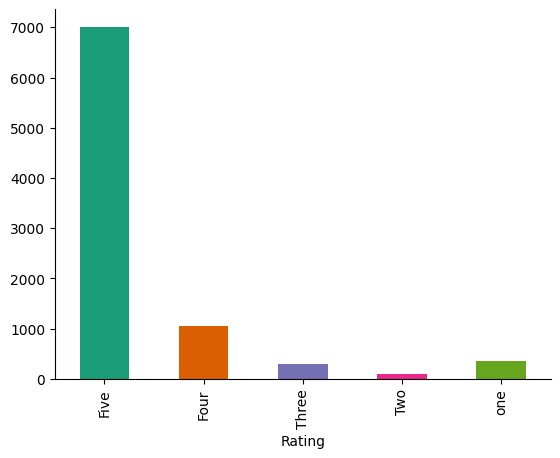

In [28]:
# @title Rating

from matplotlib import pyplot as plt
import seaborn as sns
df1.groupby('Rating').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

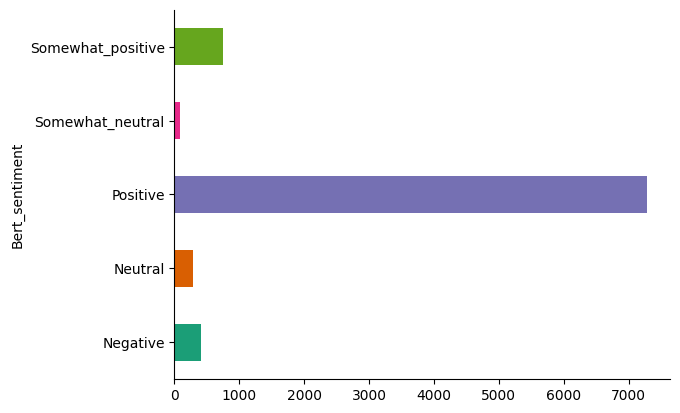

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
df1.groupby('Bert_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

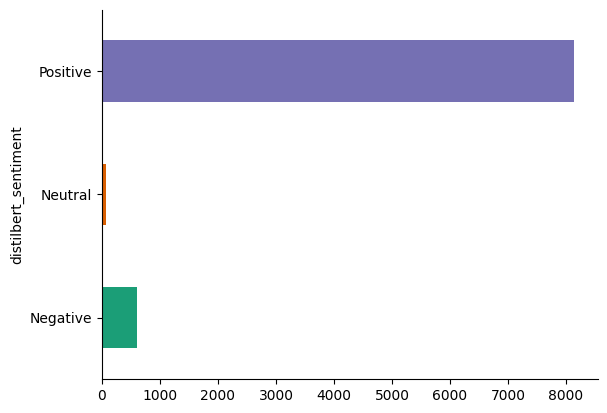

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
df1.groupby('distilbert_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [32]:
final=df[['Month','First_Expression','Review','Rating','Bert_sentiment','distilbert_sentiment']]

In [37]:
final.to_csv('final_analysis',index=False)